In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Probability ##

In [2]:
# Discussion Question (a)
# P(Mo and Jo both appear)
# P(Mo picked first, then Joe is picked) + P(Jo picked first, Mo picked second)
(1/100)*(1/99) + (1/100)*(1/99)

0.00020202020202020205

In [3]:
# Discussion Question (b)
# P(neither Mo nor Jo appears)
# P(neither Mo nor Jo is picked first)*P(neither mo nor jo is picked second, given neither is picked first)
(98/100)*(97/99)

0.9602020202020202

## Conditional Probability ##

In [ ]:
# P(has disease | tests positive)

In [20]:
0.01*0.97/(0.01*0.97 + 0.99*0.05)

0.16385135135135134

## Random Sampling ##

In [4]:
united = Table.read_table('united_summer2015.csv')
united = united.with_column('Row', np.arange(united.num_rows))
united = united.select("Row", "Date", "Flight Number", "Destination", "Delay")

In [5]:
united

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
5,6/1/15,273,SEA,-6
6,6/1/15,278,SEA,-8
7,6/1/15,292,EWR,12
8,6/1/15,300,HNL,20
9,6/1/15,317,IND,-10


#### Original Data

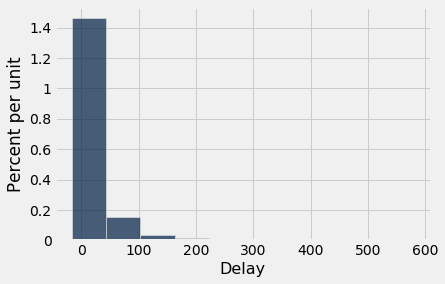

In [6]:
united.hist("Delay")

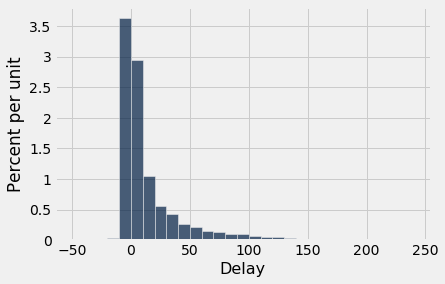

In [7]:
united.hist("Delay", bins=np.arange(-50, 250, 10))

#### Deterministic Sample

In [8]:
deterministic = united.where("Flight Number", are.equal_to(73))
deterministic

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
151,6/2/15,73,HNL,0
297,6/3/15,73,HNL,354
446,6/4/15,73,HNL,64
603,6/5/15,73,HNL,0
761,6/6/15,73,HNL,39
885,6/7/15,73,HNL,7
1032,6/8/15,73,HNL,7
1189,6/9/15,73,HNL,14
1344,6/10/15,73,HNL,0


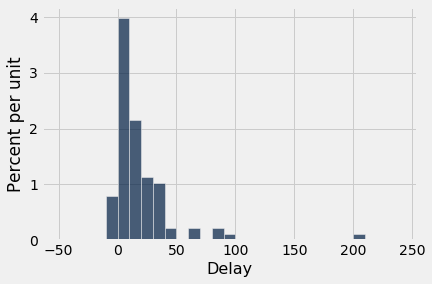

In [9]:
deterministic.hist("Delay", bins=np.arange(-50, 250, 10))

In [10]:
deterministic_2 = united.take(make_array(999, 1000, 1001))
deterministic_2

Row,Date,Flight Number,Destination,Delay
999,6/7/15,1684,LIH,-3
1000,6/7/15,1692,EWR,7
1001,6/7/15,1699,ATL,6


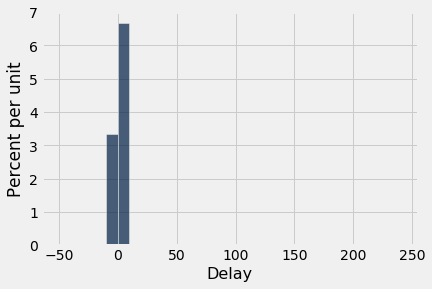

In [11]:
deterministic_2.hist("Delay", bins=np.arange(-50, 250, 10))

#### Systematic Sample

In [12]:
start = np.random.choice(np.arange(1000))
systematic = united.take(np.arange(start, united.num_rows, 1000))
systematic

Row,Date,Flight Number,Destination,Delay
452,6/4/15,267,PHL,2
1452,6/10/15,1586,ORD,-1
2452,6/17/15,736,EWR,-2
3452,6/23/15,1975,FLL,3
4452,6/30/15,1458,DEN,-2
5452,7/7/15,1670,HNL,-8
6452,7/14/15,642,SEA,-3
7452,7/20/15,1754,EWR,20
8452,7/27/15,1038,LAS,-3
9452,8/2/15,1914,IAH,16


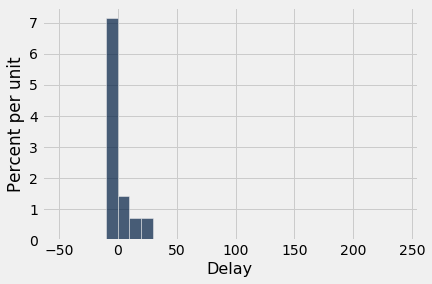

In [14]:
systematic.hist("Delay", bins= np.arange(-50, 250, 10))

#### Convenience Sample

#### Random Sampling With Replacement

In [16]:
with_rep = united.sample(500)
with_rep

Row,Date,Flight Number,Destination,Delay
11816,8/17/15,1984,PDX,26
9233,8/1/15,663,HNL,20
12006,8/19/15,753,DEN,8
12227,8/20/15,1704,IAD,-3
737,6/5/15,1742,LAS,15
6646,7/15/15,1178,PDX,-2
8348,7/26/15,1608,EWR,-2
1721,6/12/15,1076,BOS,66
13824,8/31/15,2013,EWR,-2
4195,6/28/15,1950,CLE,20


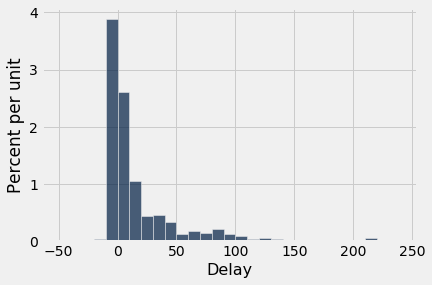

In [17]:
with_rep.hist("Delay", bins=np.arange(-50, 250, 10))

#### Simple Random Samples

In [18]:
without_rep = united.sample(500, with_replacement=False)
without_rep

Row,Date,Flight Number,Destination,Delay
9037,7/31/15,276,EWR,-6
8784,7/29/15,1092,LAS,-4
6998,7/17/15,1616,SEA,5
2286,6/16/15,587,SNA,6
6238,7/12/15,1950,CLE,-2
6425,7/14/15,331,DEN,-7
1274,6/9/15,1187,EWR,9
8061,7/24/15,1531,RDU,-1
9078,7/31/15,704,JFK,-2
7480,7/21/15,237,STL,-1


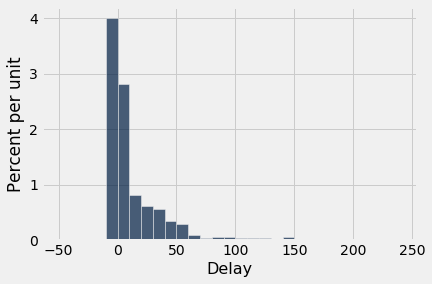

In [19]:
without_rep.hist("Delay", bins=np.arange(-50, 250, 10))